In [1]:
# CS671_DEEP_LEARNING
# Programming Assignment 2
# Course Instructor : Aditya Nigam (Assistant Professor)
# 18 March 2019
# Question-1
# Submitted By Group_06


# Used keras, tensorflow, matplotlib
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [4]:
image_index = 7777

In [5]:
print(y_train[image_index])

8


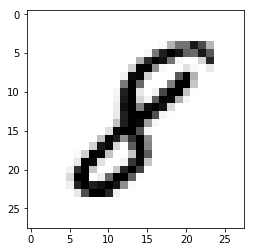

In [6]:
plt.imshow(x_train[image_index], cmap='Greys')

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [9]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [10]:
input_shape = (28, 28, 1)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
# Normalizing the RGB values
x_train /= 255
x_test /= 255

In [13]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [14]:

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(7,7), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(1024, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
# model summary
summary = model.summary()
print(summary)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        1600      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              6423552   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 6,435,530
Trainable params: 6,435,466
Non-trainable params: 64
_________________________________________________________________

In [16]:
# Comiling model and training it
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, np_utils.to_categorical(y_train), validation_split=0.25, epochs=10, batch_size=16, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 367s 8ms/step - loss: 0.2017 - acc: 0.9572 - val_loss: 0.1007 - val_acc: 0.9701
Epoch 2/10
45000/45000 [==============================] - 382s 8ms/step - loss: 0.0653 - acc: 0.9823 - val_loss: 0.1134 - val_acc: 0.9713
Epoch 3/10
45000/45000 [==============================] - 370s 8ms/step - loss: 0.0460 - acc: 0.9878 - val_loss: 0.0745 - val_acc: 0.9833
Epoch 4/10
45000/45000 [==============================] - 367s 8ms/step - loss: 0.0324 - acc: 0.9915 - val_loss: 0.0827 - val_acc: 0.9832
Epoch 5/10
45000/45000 [==============================] - 390s 9ms/step - loss: 0.0321 - acc: 0.9926 - val_loss: 0.0927 - val_acc: 0.9811
Epoch 6/10
45000/45000 [==============================] - 389s 9ms/step - loss: 0.0255 - acc: 0.9937 - val_loss: 0.1070 - val_acc: 0.9833
Epoch 7/10
45000/45000 [==============================] - 377s 8ms/step - 

In [18]:
# Evaluating model
evaluate = model.evaluate(x_test, np_utils.to_categorical(y_test))
print(evaluate)

10000/10000 [==============================] - 6s 565us/step
[0.11972708850347254, 0.9848]


In [19]:
# save model
model.save('mnist_model_part1.h5')  # creates a HDF5 file

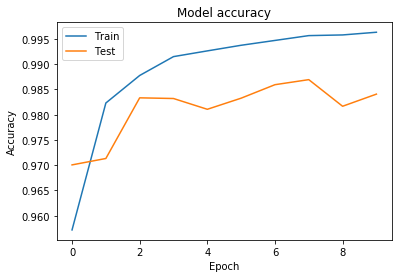

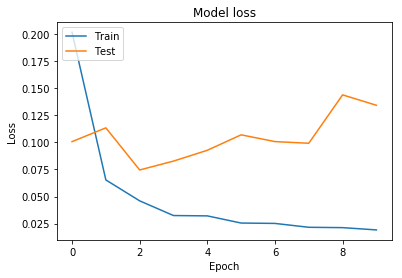

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# plt.savefig('training-validation-accurracy.png')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# plt.savefig('training-validation-loss.png')